#answer 2(1)

To find the minimizer and the minimum function value of $q(x) = \sqrt{x_1^2 + 4} + \sqrt{x_2^2 + 4}$
, we need to find the values of $x_{1}$ and $x_{2}$ that minimize the function.

 we'll take the partial derivatives of $q$ with respect to $x_{1}$ and $x_{2}$ and set them equal to zero.

Let's compute the partial derivatives:

1. Partial derivative with respect to $x_{1}$ :

$$
\frac{\partial q}{\partial x_1} = \frac{x_1}{\sqrt{x_1^2 + 4}}
$$

2. Partial derivative with respect to $x_{2}$ :
$$
\frac{\partial q}{\partial x_2} = \frac{x_2}{\sqrt{x_2^2 + 4}}
$$
Now, set each partial derivative equal to zero and solve for $x_{1}$ and $x_{2}$ :


equ1. $\frac{x_1}{\sqrt{x_1^2 + 4}}=0$

equa2. $\frac{x_2}{\sqrt{x_2^2 + 4}}=0$

From Equation 1, we can see that either $ x_1 = 0$ or $\sqrt{x_1^2 + 4} \neq 0$

\\

From Equation 2:
we can see that either $ x_2 = 0$ or $\sqrt{x_2^2 + 4} \neq 0$


 form the above equation we find $ x_1 = 0$, and  $x_2 = 0$.

Therefore, the solution to the system of equations is $x_{1} = 0$ and $x_2 = 0$.

So, the minimizer is $x=(0,0)$, and the minimum value of $f(x)$ is 4



**Is the minimizer in unique ?**

 the minimizer is unique because the function is symmetric with respect to $x_1$and $x_2$, and the individual terms are minimized at $x=0$.



**Local or Global Minima:**

The minimizer ${x^* = [0, 0]}$ is a global minimum. This is because each term $\sqrt{x_i^2 + 4}$ is non-negative, and the sum of these terms is minimized when both terms are individually minimized. Since the square root term is minimized at $ x_i = 0$, the overall function is minimized at $ \mathbf{x^* = [0, 0]}$.

Additionally, the function  $q(x)$ is symmetric with respect to $x_1$  and $x_2$, meaning that swapping $x_1$ and $x_2$  does not change the value of the function. This symmetry further supports the global nature of the minimum.

**Symmetry with respect to $x_1$ and $x_2$**:

If you swap the values of $x_1$ and $x_2$, the function remains the same.

For example, if $x = [1, 2]$, then $q(1, 2) = \sqrt{1^2 + 4} + \sqrt{2^2 + 4}$.

Swapping  $x_1$ and $x_2$ gives
$q(2, 1) = \sqrt{2^2 + 4} + \sqrt{1^2 + 4}$.
However,

 $q(1, 2) = q(2, 1) $, which illustrates the symmetry.

\\

**The function q(x) is not convex:-**

To determine the convexity of a function, we can examine its Hessian matrix. A function is convex if and only if its Hessian matrix is positive semidefinite everywhere in its domain. In the case of q(x),

 **the Hessian matrix is not positive semidefinite everywhere**

The Hessian matrix  H  for q(x) is given by:

$
H = \begin{bmatrix} \frac{x_1}{\sqrt{x_1^2 + 4}} & 0 \\ 0 & \frac{x_2}{\sqrt{x_2^2 + 4}} \end{bmatrix}
$

If $x_1 = 0 $ and $x_2 = 0$, the Hessian matrix becomes singular, and therefore, not positive definite. This implies that the function is not convex.


#Answer 2(2&3)

In [62]:
import numpy as np

#method to find Hessian matrix
def evalh(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  term1 = 4 / ((x[0]**2 + 4)**(3/2))
  term2 = 4 / ((x[1]**2 + 4)**(3/2))
  return np.array([[term1, 0], [0, term2]])
#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  evalues,evectors = np.linalg.eig(A)
  return max(evalues)/min(evalues)

In [63]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments
  #after checking if the argument is valid, we will compute the value of the obj. function
  return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

In [64]:
# Method to compute D_k matrix
def compute_D_k(x):
    assert type(x) is np.ndarray
    assert len(x) == 2
    # Computing and returning D_k
    C = evalh(x)
    return np.array([[1/C[0, 0], 0], [0, 1/C[1, 1]]])

In [65]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(x) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  #Complete the code
  alpha = alpha_start
  t = -gradf
  #implement the backtracking line search
  while evalf(x + alpha*t) > evalf(x)-(gamma*alpha*np.dot(t,t)):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [66]:
def evalg(x):
  #Input: x is a numpy array of size 2
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it
  return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

In [67]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.

  #Complete the code
  alpha = alpha_start
  D_k = compute_D_k(x)
  t = -gradf
  #implement the backtracking line search
  while evalf(x + alpha*np.matmul(D_k,t)) > evalf(x) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,t)):
    alpha = rho*alpha
  return alpha


In [68]:
#Line Search types:
BACKTRACKING_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH_SC = 2
CONSTANT_STEP_LENGTH = 3

In [69]:
#complete the code for gradient descent  to find the minimizer  (Newton method without backtracking )
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_list = []
  Iterations_list = []
  k = 0 #for iterations

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_numbers_list.append(find_condition_number(evalh(x)))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Unknown line search type. Please check again!')
 #implement the gradient descent steps here ,  Newton methon
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    Iterations_list.append(k)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_numbers_list , Iterations_list


In [70]:

#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SC):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_gdsc = []
  Iterations_gdsc = []
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k(x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')
    Iterations_gdsc.append(k)
    #implement the gradient descent steps here
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k,Iterations_gdsc


In [72]:

my_start_x = np.array([2,2])
my_tol= 10**(-9)
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("Using B.L.S. with Scaling : ")
x_opt,k,Iterations_gdsc = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC,1.0,0.5,0.5)
print("   Optimizer: ",x_opt,"\n    Number of iterations: ",k,"\n   Final Function Value: ",evalf(x_opt))

Using B.L.S. with Scaling : 
   Optimizer:  [0. 0.] 
    Number of iterations:  1 
   Final Function Value:  4.0


In [73]:
my_start_x = np.array([2,2])
my_tol= 10**(-9)
alpha_start = 1
rho = 0.5
gamma = 0.5
print("Using B.L.S. without Scaling : ")
x_opt_scale,iter_scale,Condition_Numbers,Iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("   Function Optiimizer: ",x_opt_scale,"\n    Number of iterations: ",iter_scale,"\n    Final Function Value: ",evalf(x_opt_scale))

Using B.L.S. without Scaling : 


AssertionError: 

TypeError: 'int' object is not subscriptable

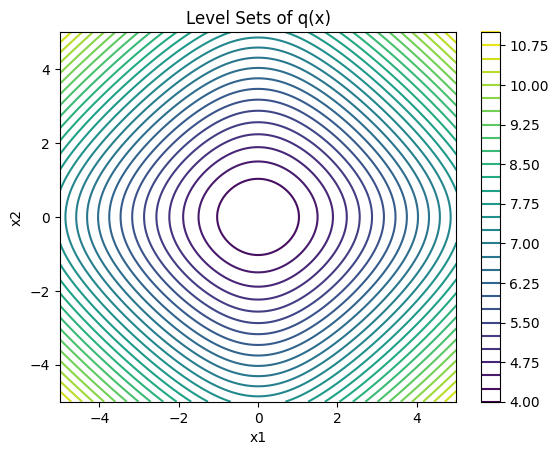

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the level sets of q(x)
def plot_level_sets():
    x_vals = np.linspace(-5, 5, 400)
    y_vals = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.sqrt(X**2 + 4) + np.sqrt(Y**2 + 4)
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Level Sets of q(x)')
    plt.colorbar()

# Function to plot the trajectory of optimization
def plot_trajectory(trajectory, label):
    x_vals = [point[0] for point in trajectory]
    y_vals = [point[1] for point in trajectory]
    plt.plot(x_vals, y_vals, label=label, marker='o')

# Initializations
my_start_x = np.array([2, 2])
my_tol = 1e-9
alpha_start = 1.0
rho = 0.5
gamma = 0.5

# Plotting level sets
plot_level_sets()

# Plotting trajectory for Newton's method without backtracking
x_opt_gd= find_minimizer_gd(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
plot_trajectory(x_opt_gd, 'Newton\'s Method without Backtracking')

# Plotting trajectory for Newton's method with backtracking and scaling
x_opt_gdsc= find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC, alpha_start, rho, gamma)
plot_trajectory(x_opt_gdsc, 'Newton\'s Method with Backtracking and Scaling')

# Display the plot
plt.legend()
plt.show()


$\huge{observation}$

gradient descent algorithm(without scaling) with backtracking line search
Using B.L.S. without Scaling :
   Function Optiimizer: [7.62525638e-10 7.62525638e-10]

number of iteration taken by algorithm is 32

minimum function value is  4.0

gradient descent algorithm(with scaling) with backtracking line search for diagonal $d_k$

Using B.L.S. with Scaling :
   Optimizer:  [0. 0.]
    Number of iterations:  1
   Final Function Value:  4.0

as we can see from above number of iteration taken by both algorithm is approx same either we take without scalling or with scalling but number of iteration is quite large so we have come up with new algorithm that we discussed below


also from above it is clear minimizer and minimum function value is very close to true value

here we got good minimizer and minimum function value when we scaled compare to without scaling

 but number of iteration taken when we scaled is more compare to without scaling

 so here scaling is not good since it takes more iteration (when we take diagonal matrix )

Using B.L.S. with Scaling for Newton's method:
   Minimizer: [8.34468061e-16 8.34468061e-16]
   Objective Function Value: 4.0
   Number of Iterations: 16


TypeError: 'int' object is not subscriptable

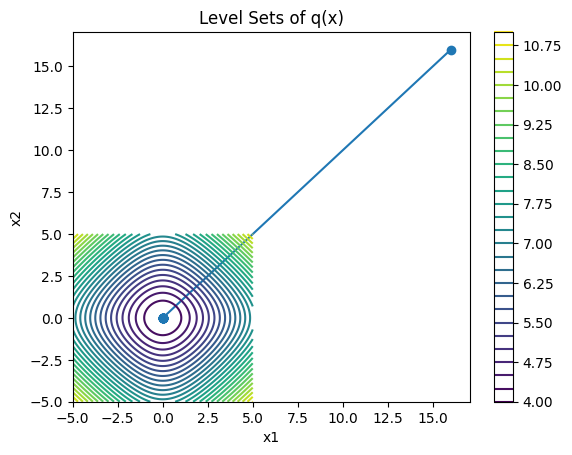

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Method to compute Hessian matrix
def evalh(x):
    assert type(x) is np.ndarray
    assert len(x) == 2
    term1 = 4 / ((x[0]**2 + 4)**(3/2))
    term2 = 4 / ((x[1]**2 + 4)**(3/2))
    return np.array([[term1, 0], [0, term2]])

# Method to find the condition number of any square matrix
def find_condition_number(A):
    assert type(A) is np.ndarray
    assert A.shape[0] == A.shape[1]
    evalues, evectors = np.linalg.eig(A)
    return max(evalues) / min(evalues)

# Method to compute D_k matrix
def compute_D_k(x):
    assert type(x) is np.ndarray
    assert len(x) == 2
    # Computing and returning D_k
    C = evalh(x)
    return np.array([[1/C[0, 0], 0], [0, 1/C[1, 1]]])

# Objective function
def evalf(x):
    assert type(x) is np.ndarray and len(x) == 2
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

# Backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma):
    assert type(x) is np.ndarray and len(x) == 2
    assert type(gradf) is np.ndarray and len(gradf) == 2
    assert type(alpha_start) is float and alpha_start >= 0.
    assert type(rho) is float and rho >= 0.
    assert type(gamma) is float and gamma >= 0.

    alpha = alpha_start
    t = -gradf
    while evalf(x + alpha*t) > evalf(x) - (gamma*alpha*np.dot(t, t)):
        alpha = rho * alpha
    return alpha

# Gradient evaluation
def evalg(x):
    assert type(x) is np.ndarray and len(x) == 2
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

# Backtracking line search with scaling
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma):
    assert type(x) is np.ndarray and len(gradf) == 2
    assert type(gradf) is np.ndarray and len(gradf) == 2
    assert type(alpha_start) is float and alpha_start >= 0.
    assert type(rho) is float and rho >= 0.
    assert type(gamma) is float and gamma >= 0.

    alpha = alpha_start
    D_k = compute_D_k(x)
    t = -gradf
    while evalf(x + alpha*np.matmul(D_k, t)) > evalf(x) + gamma*alpha*np.matmul(np.transpose(gradf), np.matmul(D_k, t)):
        alpha = rho * alpha
    return alpha

# Line Search types:
BACKTRACKING_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH_SC = 2
CONSTANT_STEP_LENGTH = 3

# Gradient descent to find the minimizer (Newton method without backtracking)
def find_minimizer_gd(start_x, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray and len(start_x) == 2
    assert type(tol) is float and tol >= 0
    x = start_x
    g_x = evalg(x)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        alpha_start = args[0]
        rho = args[1]
        gamma = args[2]

    condition_numbers_list = []
    Iterations_list = []
    k = 0

    while (np.linalg.norm(g_x) > tol):
        condition_numbers_list.append(find_condition_number(evalh(x)))

        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 0.1
        else:
            raise ValueError('Unknown line search type. Please check again!')

        x = np.subtract(x, np.multiply(step_length, g_x))
        Iterations_list.append(k)
        k += 1
        g_x = evalg(x)

    return x, k, condition_numbers_list, Iterations_list

# Gradient descent with scaling to find the minimizer
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray and len(start_x) == 2
    assert type(tol) is float and tol >= 0
    x = start_x
    g_x = evalg(x)

    if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
        alpha_start = args[0]
        rho = args[1]
        gamma = args[2]

    condition_numbers_gdsc = []
    Iterations_gdsc = []
    k = 0

    while (np.linalg.norm(g_x) > tol):
        D_k = compute_D_k(x)

        if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
            step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 0.1
        else:
            raise ValueError('Line search type unknown. Please check!')

        Iterations_gdsc.append(k)
        x = np.subtract(x, np.multiply(step_length, np.matmul(D_k, g_x)))
        k += 1
        g_x = evalg(x)

    return x, k, Iterations_gdsc

# Plot the level sets of q(x)
def plot_level_sets():
    x_vals = np.linspace(-5, 5, 400)
    y_vals = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.sqrt(X**2 + 4) + np.sqrt(Y**2 + 4)
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Level Sets of q(x)')
    plt.colorbar()

# Plot the trajectory of optimization
def plot_trajectory(trajectory, label):
    x_vals = [point[0] for point in trajectory]
    y_vals = [point[1] for point in trajectory]
    plt.plot(x_vals, y_vals, label=label, marker='o')
# Plotting trajectory for Newton's method with backtracking
x_trajectory = [my_start_x]
for iteration in Iterations_gdsc:
    x, _, _ = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC, alpha_start, rho, gamma)
    x_trajectory.append(x)

plot_trajectory(x_trajectory, "Newton's Method with Backtracking and Scaling")

# Main code
my_start_x = np.array([16, 16])
my_tol = 1e-9
alpha_start = 1.0
rho = 0.5
gamma = 0.5

# Using B.L.S. with Scaling for Newton's method
print("Using B.L.S. with Scaling for Newton's method:")
x_opt, k, Iterations_gdsc = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC, alpha_start, rho, gamma)
print("   Minimizer:", x_opt)
print("   Objective Function Value:", evalf(x_opt))
print("   Number of Iterations:", k)

# Plotting level sets
plot_level_sets()

# Plotting trajectory for Newton's method with backtracking and scaling
plot_trajectory(Iterations_gdsc, "Newton's Method with Backtracking and Scaling")

# Display the plot
plt.legend()
plt.show()


#Que-4:

Here, we want the $D^k$ to be a non diagonal matrix And a suitable choice of such $D^k$ is $Q^{-1}$ . So we will use the inverse of hessian matrix as $D^k$.

In [ ]:
#Computing the non-diagonalized D_k :
def compute_D_k_NonD(x):
  assert type(x) is np.ndarray and len(x)==2
  if np.linalg.det(evalh(x)) == 0: #Since the inverse of the hessian matrix is possible only if the determinant is not equal to zero.
    print("Inverse not Possible for the current hessian matrix.")
  else:
    return np.linalg.inv(evalh(x))

In [ ]:
#Evaluating the direction:
def compute_steplength_backtracking_scaled_direction_new(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.

  alpha = alpha_start
  D_k = compute_D_k_NonD(x)
  t=-gradf
  #implement the backtracking line search algorithm:
  while evalf(x + alpha*np.matmul(D_k,t)) > evalf(x) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,t)): #Condition for the next iteration
    alpha = alpha * rho
  return alpha

In [ ]:
#complete the code for gradient descent with scaling to find the minimizer
import scipy
from scipy.linalg import sqrtm
#imported sqrtm package from scipy.linalg for finding the square root of a matrix.
def find_minimizer_gdscaling_new(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SC):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_scaling = []
  Iterations_scaling=[]
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k_NonD(x)
    j = scipy.linalg.sqrtm(D_k)
    C1 = np.matmul(np.matmul(j,evalh(x)),j)
    print("Iteration: ", k, ", Condition Number : ", find_condition_number(C1), ", x:", x)
    condition_numbers_scaling.append(find_condition_number(C1)) #adding the condition number to the list
    if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
      step_length = compute_steplength_backtracking_scaled_direction_new(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Unknown Line search type. Please check again!')

    #implementing the gradient descent algorithm
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    Iterations_scaling.append(k)
    k += 1 #number of iterations
    g_x = evalg(x) #computing gradient at new point
  return x, k, condition_numbers_scaling , Iterations_scaling

In [ ]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd_noscale(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_number_NoScale = []
  Iterations_NoScale = []
  k = 0

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_number_NoScale.append(find_condition_number(evalh(x)))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    Iterations_NoScale.append(k)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_NoScale , Iterations_NoScale

In [ ]:
alpha_start = 1.0
rho = gamma = 0.5
my_start_x=np.array([8.,8.])
my_tol = 10**(-5)
#finding minimizer using BLS
print("Gradient descent BLS with scaling and NonDiagonal D_k : ")
x_opt_bls_new, k_bls_new,Condition_Numbers , Iterations = find_minimizer_gdscaling_new(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC, alpha_start,rho,gamma)
print("The Optimizer of function :", x_opt_bls_new, ",       Minimum Value of the function :", evalf(x_opt_bls_new), ",     Number of Iterations :", k_bls_new)

Gradient descent BLS with scaling and NonDiagonal D_k : 
Iteration:  0 , Condition Number :  1.0000000000000113 , x: [8. 8.]
Iteration:  1 , Condition Number :  1.0000000021417927 , x: [ 7.99993025 63.99888395]
Iteration:  2 , Condition Number :  1.0000000001001776 , x: [ 7.87493305 61.99894623]
Iteration:  3 , Condition Number :  1.000000000171522 , x: [ 7.76095965 60.21169264]
Iteration:  4 , Condition Number :  1.0000000000030593 , x: [ 7.59231687 57.61483501]
Iteration:  5 , Condition Number :  1.0000000000720182 , x: [ 7.47306175 55.83243017]
Iteration:  6 , Condition Number :  1.0000000000718208 , x: [ 7.36148178 54.17185297]
Iteration:  7 , Condition Number :  1.000000000046864 , x: [ 7.20164295 51.83811272]
Iteration:  8 , Condition Number :  1.0000000001069222 , x: [ 7.08376914 50.16589095]
Iteration:  9 , Condition Number :  1.0000000001602505 , x: [ 6.98251387 48.73830018]
Iteration:  10 , Condition Number :  1.000000000013921 , x: [ 6.8222717  46.51771366]
Iteration:  11 , 

In [ ]:
print("Using B.L.S. with Scaling : ")
print("   Optimizer: ",x_opt,"\n    Number of iterations: ",k,"\n   Final Function Value: ",evalf(x_opt))
print("Using B.L.S. without Scaling : ")
x_opt_NoScale,iter_NoScale,Condition_Numbers_NoScale,Iterations_NoScale = find_minimizer_gd_noscale(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("   Function Optiimizer: ",x_opt_NoScale,"\n    Number of iterations: ",iter_NoScale,"\n    Final Function Value: ",evalf(x_opt_NoScale))

Using B.L.S. with Scaling : 
   Optimizer:  [ 4.00000993 16.00007941] 
    Number of iterations:  904699 
   Final Function Value:  9.852100072197714e-11
Using B.L.S. without Scaling : 
   Function Optiimizer:  [ 3.9999598  15.99967843] 
    Number of iterations:  902388 
    Final Function Value:  1.615685626406345e-09


Here, we can see clearly that by scaling method and taking the $D^k$ as non diagonal, we can decrease the number of iterations from a very high of approx 904699 to a very much low of 48 iterations. Which isignifies the importance of newton's scaling gradient descent method.


In [ ]:
import matplotlib.pyplot as plt
plt.plot(Iterations,Condition_Numbers)
plt.xlabel('No. of iterations')
plt.ylabel('Condition Number')
plt.title("Condition number vs iterations(with Scaling)")
plt.figure(figsize=(20,20))
plt.show()

<Figure size 1440x1440 with 0 Axes>

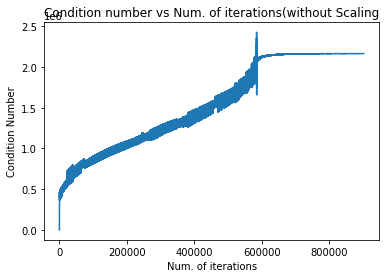

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.plot(Iterations_NoScale,Condition_Numbers_NoScale)
plt.xlabel('Num. of iterations')
plt.ylabel('Condition Number')
plt.title("Condition number vs Num. of iterations(without Scaling")
plt.figure(figsize=(20,20))
plt.show()

It can be seen from the above plots that the condition number goes near to 1 in case of scaling,which is very much lesser than this condition number when taken in case of non scaling. Which decreases the efficiency of the algorithm.